# Optional Assignment 3
Yan Chen Zhou - 100496757

## 1. Prove that $G$ is a stochastic matrix
A stochastic matrix is one where the sum of its columns is always one.

We defined $G$ as $$G_{ij} = \frac qn + \frac{(1-q)A_{ji}}{n_j}$$ where $n_j$ is the sum of the $j$-th row of $A$. Note that $\sum_{i = 1}^n A_{ji}$ is also the sum of the $i$-th row of $A$, therefore
$$
\begin{align}
\sum_{i = 1}^n G_{ij} &= \sum_{i = 1}^n \bigg(\frac qn + \frac{(1-q)A_{ji}}{n_j}\bigg) \\
    &= q + (1-q) \sum_{i = 1}^n \frac{A_{ji}}{n_j} \\
    &= q + (1-q) \\ 
    &= 1
\end{align}
$$

## 2. Construction of $G$

Let us define the matrix $A$ as

In [84]:
import numpy as np

n = 15
graph = (
    (1, 2), (1, 9),
    (2, 3), (2, 5), (2, 7),
    (3, 2), (3, 6), (3, 8),
    (4, 3), (4, 12),
    (5, 1), (5, 10),
    (6, 10), (6, 11),
    (7, 10), (7, 11),
    (8, 4), (8, 11),
    (9, 5), (9, 6), (9, 10),
    (10, 13),
    (11, 15),
    (12, 7), (12, 8), (12, 11),
    (13, 9), (13, 14),
    (14, 10), (14, 11), (14, 13), (14, 15),
    (15, 12), (15, 14),
)
A = np.zeros((n, n))
for i in graph:
    A[i[0]-1][i[1]-1] = 1

print(A)

[[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]


Then we set $q=0.15$ and compute $G$ and $p$. We will be using norm 1 in the power method to normalize the vector.

In [85]:
n, q = 15, 0.15
def computeG(matrix):
    G = np.zeros((n, n))
    for j in range(n):
        n_j = np.sum(matrix[j])  
        G[:, j] = q / n + matrix[j] * (1 - q) / n_j  

    return G

def powerMethod(G, iterations=100):
    x = np.random.rand(n)
    x = x / np.linalg.norm(x, ord=1)
    for _ in range(iterations):
        x = np.dot(G, x)
        x = x / np.linalg.norm(x, ord=1)

    return x

G = computeG(A)
p = powerMethod(G)
print(f"Sum of the columns of G: {np.sum(G, axis=0)}")
print(f"The eigenvector p: \n{p}, {np.argmax(p)}")

Sum of the columns of G: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The eigenvector p: 
[0.02682457 0.02986108 0.02986108 0.02682457 0.03958722 0.03958722
 0.03958722 0.03958722 0.07456439 0.10631995 0.10631995 0.07456439
 0.12509164 0.11632789 0.12509164], 12


We can see that the sum of the columns of $G$ is indeed equal to $1$. Moreover, we can verify that the eigenvector $p$ is the same.

## 3 Changing the jump probability $q$
Let's set $q_1 = 0$ and $q_2=0.5$ and compute $G_{i}$ and $p_{i}$

In [86]:
q = 0
G = computeG(A)
p = powerMethod(G)
max_p = np.max(p)
print(f"(a) q=0.0 p: {p}")

q = 0.5
G = computeG(A)
p = powerMethod(G)
max_p = np.max(p)
print(f"(b) q=0.5 p:\n{p}")

(a) q=0.0 p: [0.01544402 0.01158301 0.01158301 0.01544402 0.03088803 0.03088803
 0.03088803 0.03088803 0.08108108 0.11003861 0.11003861 0.08108108
 0.14671815 0.14671815 0.14671815]
(b) q=0.5 p:
[0.04673566 0.0540207  0.0540207  0.04673566 0.0536093  0.0536093
 0.0536093  0.0536093  0.06763511 0.09463396 0.09463396 0.06763511
 0.09047144 0.07856906 0.09047144]


We can verify that biggest rank value are $0.14671815$ and $0.09463396$ in each eigenvector $p_{1}$ and $p_2$ respectively. However, these values are not unique.

The jump probability $q$ serves to give more relevance to those pages that has more receiving traffic than outgoing.

## 4 Improving Page 7's Rank


In [87]:
q = 0.15
G = computeG(A)
p = powerMethod(G)

for i in ((2, 7), (12, 7)):
    A[i[0]-1][i[1]-1] = 2

G = computeG(A)
doped_p = powerMethod(G)
print(f"Original eigenvector: {p}")
print(f"Highest ranked page: {np.argmax(p)+1}")
print(f"Modified eigenvector: {doped_p}")
print(f"Highest ranked page: {np.argmax(doped_p)+1}")
print(f"\nDifference in page ranking: {doped_p-p}")

Original eigenvector: [0.02682457 0.02986108 0.02986108 0.02682457 0.03958722 0.03958722
 0.03958722 0.03958722 0.07456439 0.10631995 0.10631995 0.07456439
 0.12509164 0.11632789 0.12509164]
Highest ranked page: 13
Modified eigenvector: [0.02599622 0.02847917 0.02622626 0.02393986 0.03763817 0.03901712
 0.05284145 0.03279967 0.0761871  0.11154626 0.10327246 0.07232423
 0.12973813 0.1172885  0.12270539]
Highest ranked page: 13

Difference in page ranking: [-0.00082835 -0.00138191 -0.00363482 -0.0028847  -0.00194905 -0.0005701
  0.01325423 -0.00678754  0.00162271  0.00522631 -0.0030475  -0.00224015
  0.00464649  0.00096061 -0.00238624]


There changes are very small, but it has succeded on improving its page rank and is now surpasing its competitor Page 6. Moreover, it has also benefitted Pages 8, 9 and 13.

## 5 Removal of Page $10$
We'll reverse the modification from the previous section and remove Page 10:

In [88]:
# Remove row 10 and column 10 from A
n = 14
for i in ((2, 7), (12, 7)):
    A[i[0]-1][i[1]-1] = 1
A = np.delete(A, 10, axis=0)
A = np.delete(A, 10, axis=1)

G = computeG(A)
p = powerMethod(G)
print(f"Eigenvector: {p}")
print(f"Highest ranked page: {np.argmax(p)+1}")
print(f"Lowest ranked page: {np.argmin(p)+1}")
print(f"Rank of each page is {np.array([i+1 for i in p.argsort().argsort()])}")

Eigenvector: [0.03207005 0.03593562 0.04091142 0.04709499 0.05024885 0.05165866
 0.04139102 0.04280083 0.10359814 0.1709627  0.04822346 0.18648019
 0.10746218 0.0411619 ]
Highest ranked page: 12
Lowest ranked page: 1
Rank of each page is [ 1  2  3  7  9 10  5  6 11 13  8 14 12  4]


Best page now is Page 12 (previously Page 13), and the worst is Page 1.

## 6 Own Network
Assume $D$ is 

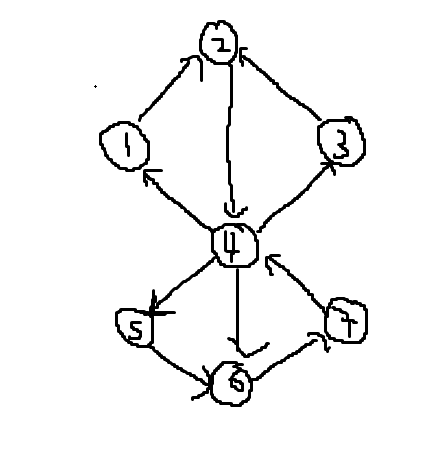

then

In [89]:
n = 7
graph = (
    (1, 2),
    (2, 4),
    (3, 2),
    (4, 1),
    (4, 3),
    (4, 5),
    (4, 6),
    (5, 6),
    (6, 7),
    (7, 4)
)
D = np.zeros((n, n))
for i in graph:
    D[i[0]-1][i[1]-1] = 1

G = computeG(D)
p = powerMethod(G)
print(f"Eigenvector: {p}")
print(f"Highest ranked page: {np.argmax(p)+1}")
print(f"Lowest ranked page: {np.argmin(p)+1}")
print(f"Rank of each page is {np.array([i+1 for i in p.argsort().argsort()])}")


Eigenvector: [0.08247207 0.16163108 0.08247207 0.2872635  0.08247207 0.15257332
 0.15111589]
Highest ranked page: 4
Lowest ranked page: 1
Rank of each page is [1 6 2 7 3 5 4]
